## BF550 Problem Set 6 - Ryan Yordanoff

# Problem 1. Principle Component Analysis

# A)

Text(0.5, 1.0, 'Representation of 3rd & 18th Dimensions from Raw Data ')

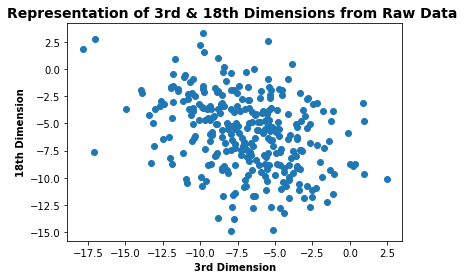

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy import spatial

#import data as pandas dataframe
raw_data = pd.read_csv('datapoints.csv')

#plot of 3rd and 18th dimensions
dim_3 = raw_data[raw_data.columns[3]]
dim_18 = raw_data[raw_data.columns[18]]

plt.scatter(dim_3,dim_18)
plt.xlabel('3rd Dimension', fontweight = 'bold')
plt.ylabel('18th Dimension', fontweight = 'bold')
plt.title('Representation of 3rd & 18th Dimensions from Raw Data ', fontweight = 'bold', fontsize = 14)

# B)

In [10]:
#raw values standardized/scaled
data_scaled = StandardScaler().fit_transform(raw_data) 

#PCA fit and display
pca = PCA()
pca_data = pca.fit_transform(data_scaled)

naming_list = [f'PC {i+1}' for i in range(20)]
pd.DataFrame(pca_data, columns=naming_list)




,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15,PC 16,PC 17,PC 18,PC 19,PC 20
0,-3.113869,-2.532172,0.096166,0.185324,0.555744,-0.494945,0.292862,1.105187,-0.169302,-0.092529,0.094455,-0.244863,0.171160,0.039969,0.396513,0.549275,0.249504,0.029750,-0.630281,0.133506
1,-2.872880,-1.495775,-0.759959,1.312882,-0.377708,-1.379350,-0.202223,0.298977,0.075088,-0.982829,-0.103311,-0.130485,0.545735,0.943017,-0.589967,-0.304988,0.351901,-0.185448,-0.172782,0.230824
2,-1.520137,2.945296,-0.103888,0.761275,0.069016,-0.383623,-0.028066,-0.777222,0.731903,0.680531,0.866419,-0.753357,-1.140484,0.105570,0.097766,0.142743,-0.281264,0.021052,-0.714013,-0.291679
3,2.956187,-0.627534,-1.041199,-0.501407,-0.062864,-0.041759,-0.631467,0.926523,0.512896,-0.242742,-0.169705,0.547055,-0.074156,-0.340898,0.804448,-0.215219,-0.374926,-0.403022,-0.012356,0.339519
4,3.309341,-0.673007,-0.997370,1.188107,-0.418880,0.268477,-0.674102,0.272727,0.346649,1.117799,-0.470771,0.625851,-0.413139,-0.275758,0.179786,-0.515685,0.410835,0.418016,0.182096,0.076664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-1.187343,3.510869,0.839288,0.296376,2.242949,-1.149731,0.506175,1.242261,0.849060,-0.830203,-0.431412,-0.892308,-0.019625,0.099841,1.138216,0.106458,-0.045551,0.517004,-0.493406,0.447055
296,-0.686275,4.596637,0.497657,-0.806716,0.033643,-0.332601,0.166252,0.016599,-0.296968,0.084548,-0.405587,0.051344,0.284044,0.305071,0.190478,-0.478294,-0.207072,-0.087442,-0.025244,0.471903
297,3.072018,-0.629207,0.939475,0.628192,-0.120754,0.350145,-0.600639,0.136778,0.375257,1.319473,-0.316987,0.311987,-0.196431,-0.207538,-0.579439,0.462032,0.947505,0.160500,-0.350491,0.116226
298,-1.499135,3.999160,0.001098,-0.962411,-0.879967,-0.852304,-0.250173,0.137105,-1.316100,0.459481,0.530084,0.095711,0.150891,-0.699734,0.396404,-0.508875,-0.347351,-0.318611,0.846166,0.444691


# C)

[36.9  26.66  4.52  3.86  3.59  3.09  3.08  2.7   2.36  1.84  1.66  1.31
  1.29  1.21  1.11  1.1   1.02  0.99  0.89  0.82]


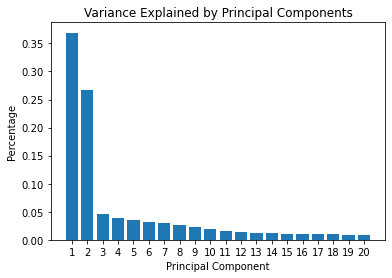

In [11]:
#plot of variance explained by PCs
plt.title('Variance Explained by Principal Components')
plt.ylabel('Percentage')
plt.xlabel('Principal Component')
plt.xticks(range(1,21))
plt.bar(range(1,21), pca.explained_variance_ratio_)

#variation displayed for clarity
variation = np.round((pca.explained_variance_ratio_ * 100),2)
print(variation)


PCA appears to be a good option to reduce the dimensions of the data provided in datapoints.csv as most of the variance can be captured in the first 2 principal components.

# D)

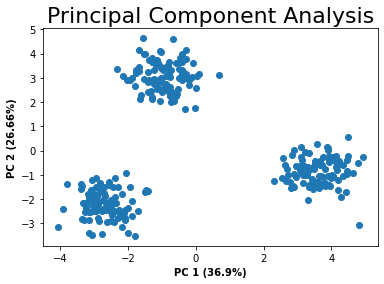

In [12]:
#setting up PCA data for plotting
pc_first_2 = PCA(n_components=2)
pc_first_2_FT = pc_first_2.fit_transform(data_scaled)
pc1 = pc_first_2_FT[:,0]
pc2 = pc_first_2_FT[:,1]



#plot of first two principle components
plt.xlabel(f'PC 1 ({variation[0]}%)', fontweight='bold')
plt.ylabel(f'PC 2 ({variation[1]}%)', fontweight='bold')
plt.title('Principal Component Analysis', fontsize = 22)

plt.scatter(pc1,pc2)

# Problem 2. K-Means Clustering

# A)

C:\Users\ryany\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


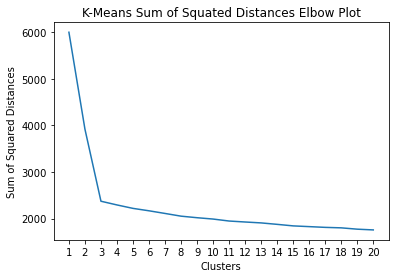

In [13]:
inertia_vals = []

#creates list of inertia values to plot
for i in range(1,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_data)
    inertia_vals.append(kmeans.inertia_)


#elbow plot
plt.xlabel('Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('K-Means Sum of Squated Distances Elbow Plot')
plt.xticks(range(0,21))
plt.plot(range(1,21),inertia_vals)


Based on the plot above the optimal amount of clusters appears to be 3. 

# B)

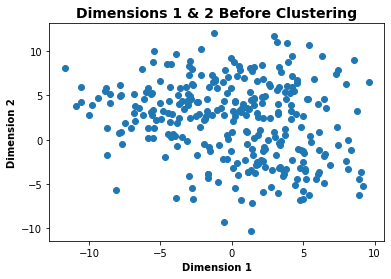

In [14]:
#plot to show data before clustering
dim_0 = raw_data[raw_data.columns[0]]
dim_1 = raw_data[raw_data.columns[1]]


plt.xlabel(f'Dimension 1', fontweight='bold')
plt.ylabel(f'Dimension 2', fontweight='bold')
plt.title('Dimensions 1 & 2 Before Clustering', fontsize = 14, fontweight='bold')
plt.scatter(dim_0,dim_1)

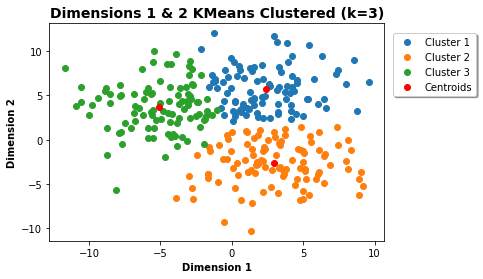

In [15]:
def kmeans(i1=dim_0,i2=dim_1,k=3,iterations=10,seed=10):
    """kmeans takes datasets(i1,i2) as inputs of a single pandas column each. k = clusters(int),
    iterations = clustering iterations (int).  Seed is a random seed for initial clustering.
    Returns a KMeans clustered scatterplot, with current iteration centroids labeled."""
    np.random.seed(seed)

    centroids_x = []
    centroids_y = []
    d_c1 = []
    d_c2 = []
    d_c3 = []
    c1_x = []
    c1_y = []
    c2_x = []
    c2_y = []
    c3_x = []
    c3_y = []

    #Creates initial centroids by choosing 3 random points from the dataset
    for i in range(k):
        r = np.random.randint(len(i1))
        centroids_x.append(i1[r])
        centroids_y.append(i2[r])

    #10 iterations of clustering
    for i in range(iterations):
        #initializes the distance lists and cluster lists
        d_c1 = []
        d_c2 = []
        d_c3 = []
        c1_x = []
        c1_y = []
        c2_x = []
        c2_y = []
        c3_x = []
        c3_y = []


        #calculates the distance from each point to each centroid
        for i in range(len(i1)):
            d_c1.append(spatial.distance.euclidean([i1[i],i2[i]],[centroids_x[0],centroids_y[0]]))
            d_c2.append(spatial.distance.euclidean([i1[i],i2[i]],[centroids_x[1],centroids_y[1]]))
            d_c3.append(spatial.distance.euclidean([i1[i],i2[i]],[centroids_x[2],centroids_y[2]]))
        
        #assigns each point to a cluster based on the lowest distance to cluster centroid
        for i in range(len(d_c1)):
            d_c_combined = [d_c1[i],d_c2[i],d_c3[i]]
        
            #Assign to cluster 1 (c1)
            if d_c_combined.index(min(d_c_combined)) == 0:
                c1_x.append(i1[i])
                c1_y.append(i2[i])
            #Assign to cluster 2 (c2)
            elif d_c_combined.index(min(d_c_combined)) == 1:
                c2_x.append(i1[i])
                c2_y.append(i2[i])
            #Assign to cluster 3 (c3)
            elif d_c_combined.index(min(d_c_combined)) == 2:
                c3_x.append(i1[i])
                c3_y.append(i2[i])
        
        #calculate new centroids
        centroids_x = []
        centroids_y = []

        #Centroid index 0 set to the average of cluster 1
        centroids_x.append(np.mean(c1_x))
        centroids_y.append(np.mean(c1_y))

        #Centroid index 1 set to the average of cluster 2
        centroids_x.append(np.mean(c2_x))
        centroids_y.append(np.mean(c2_y))

        #Centroid index 2 set to the average of cluster 3
        centroids_x.append(np.mean(c3_x))
        centroids_y.append(np.mean(c3_y))

        

    #plotting the clusters
    plt.scatter(c1_x,c1_y, label='Cluster 1')
    plt.scatter(c2_x,c2_y, label='Cluster 2')
    plt.scatter(c3_x,c3_y, label='Cluster 3')
    plt.scatter(centroids_x,centroids_y, c='red', label='Centroids')
    plt.legend(loc='upper center', bbox_to_anchor=(1.15, 0.98), shadow=True)
    plt.xlabel(f'Dimension 1', fontweight='bold')
    plt.ylabel(f'Dimension 2', fontweight='bold')
    plt.title(f'Dimensions 1 & 2 KMeans Clustered (k={k})', fontsize = 14, fontweight='bold')
    plt.show()

kmeans()